In [46]:
import numpy as np
import wfdb
import h5py
import matplotlib.pyplot as plt

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [87]:
arousals = h5py.File('../data/training/tr12-0607/tr12-0607-arousal.mat', 'r')

In [88]:
arousals = h5py.File('../data/training/tr12-0607/tr12-0607-arousal.mat', 'r')
flat = arousals['data']['arousals'].value.ravel()
positive_idx = np.where(arousals['data']['arousals'].value.ravel() != -1)
adjusted_arr = flat[positive_idx[0]]

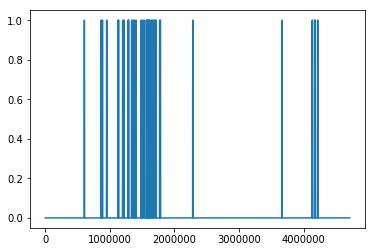

In [92]:
positive_idx = np.where(arousals['data']['arousals'].value.ravel() != -1)
adjusted_arr = flat[positive_idx[0]]
plt.plot(adjusted_arr)

In [113]:
# a = []
# with open('../data/tr12-0607.vec', 'r') as f:
#     for i in 
vec_o = np.loadtxt('../data/tr12-0607.vec')

In [114]:
# vec = np.loadtxt('../scripts/CNN_v3/outputs/24064WS_128HS_1E-03SGD-BCE/128-901.vec')
vec = np.loadtxt('../scripts/CNN_v3/outputs/negative_to_0-5--10samples-24064WS_512HS_1E-03LR-layers-16-16-16-Adam-wd1e-3-MSE/512-900.vec')

In [115]:
vec = vec[positive_idx]
vec_o = vec_o[positive_idx]

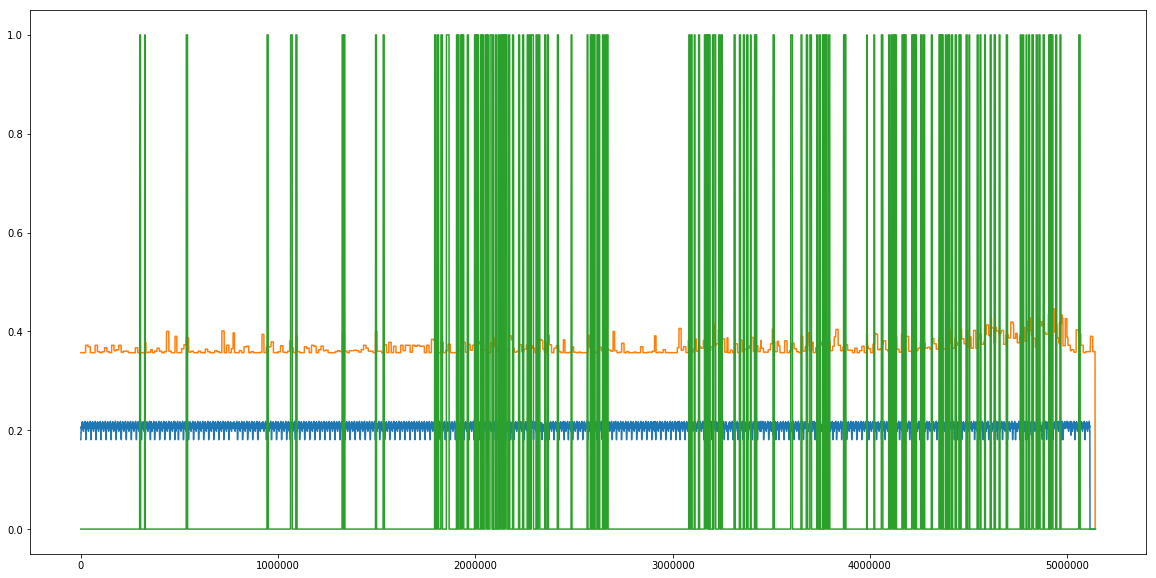

In [138]:
_ = plt.figure(figsize=(20, 10))
plt.plot(vec)
plt.plot(vec_o)
plt.plot(adjusted_arr)

In [111]:
average_precision_score(vec > 0.5, adjusted_arr)

0.031886481801398525

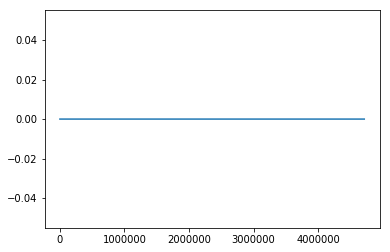

In [67]:
plt.plot(vec > 0.5)

In [118]:
mappings = {900: 'tr12-0607',
901: 'tr12-0619',
902: 'tr12-0646',
903: 'tr12-0672',
904: 'tr12-0681',
905: 'tr12-0682',
906: 'tr12-0684',
907: 'tr12-0685',
908: 'tr12-0687',
909: 'tr12-0697'}

In [119]:
i = 900

arousals = h5py.File('../data/training/{0}/{0}-arousal.mat'.format(mappings[i]), 'r')
flat = arousals['data']['arousals'].value.ravel()
positive_idx = np.where(arousals['data']['arousals'].value.ravel() != -1)
adjusted_arr = flat[positive_idx[0]]

vec_o = np.loadtxt('../data/{}.vec'.format(mappings[i]))
vec = np.loadtxt('../scripts/CNN_v3/outputs/negative_to_0-5--10samples-24064WS_512HS_1E-03LR-layers-16-16-16-Adam-wd1e-3-MSE/512-{}.vec'.format(i))

vec = vec[positive_idx]
vec_o = vec_o[positive_idx]

In [139]:
for i, m in enumerate(range(900, 910)):

    arousals = h5py.File('../data/training/{0}/{0}-arousal.mat'.format(mappings[m]), 'r')
    flat = arousals['data']['arousals'].value.ravel()
#     positive_idx = np.where(arousals['data']['arousals'].value.ravel() != -1)
#     adjusted_arr = flat[positive_idx[0]]
    with open('../data/{0}_ground_truth.vec'.format(mappings[m]), 'w') as f:
        for v in flat:
            f.write('{:.3f}\n'.format(v))
        

/beegfs/ga4493/projects/groupb/environments/physionet_env/lib/python3.5/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


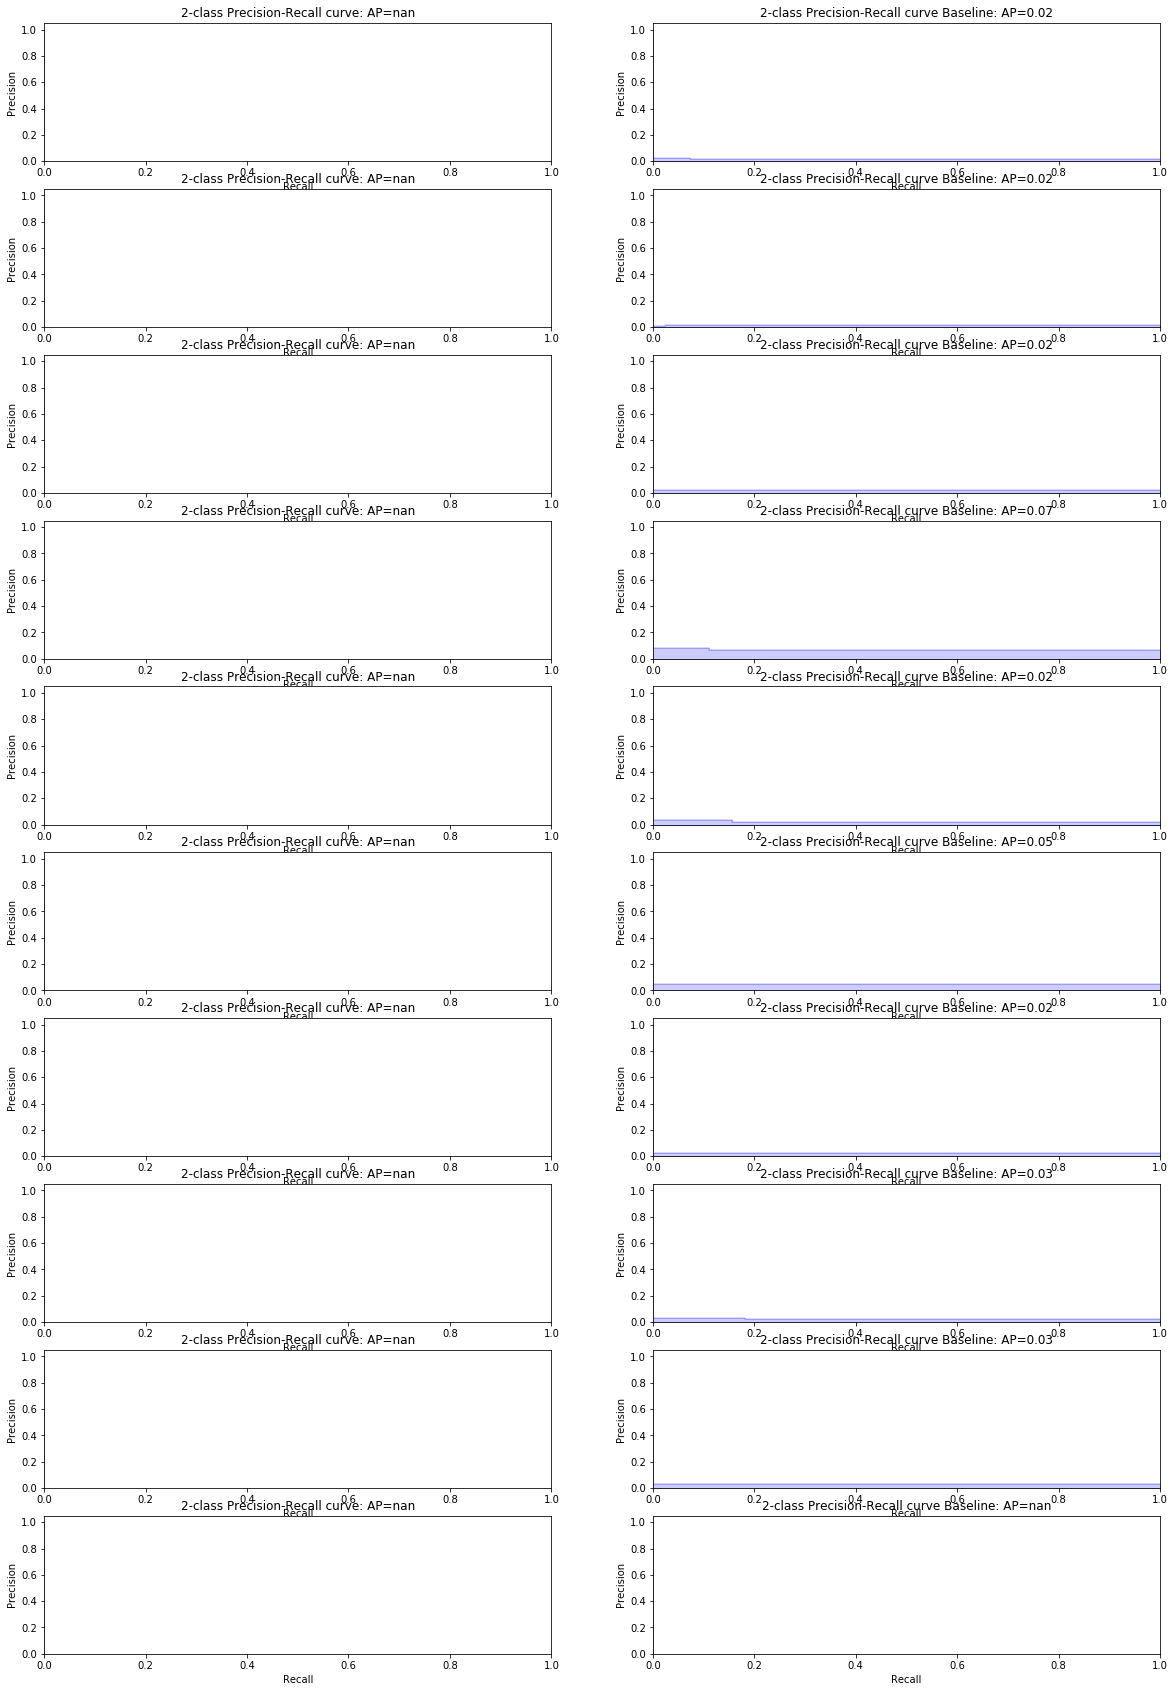

In [137]:
fig, ax = plt.subplots(10, 2, figsize=(20,30))
for i, m in enumerate(range(900, 910)):

    arousals = h5py.File('../data/training/{0}/{0}-arousal.mat'.format(mappings[m]), 'r')
    flat = arousals['data']['arousals'].value.ravel()
    positive_idx = np.where(arousals['data']['arousals'].value.ravel() != -1)
    adjusted_arr = flat[positive_idx[0]]

    vec_o = np.loadtxt('../data/{}.vec'.format(mappings[m]))
    vec = np.loadtxt('../scripts/CNN_v3/outputs/negative_to_0-5--10samples-24064WS_512HS_1E-03LR-layers-16-16-16-Adam-wd1e-3-MSE/512-{}_h.vec'.format(m))

    vec = vec[positive_idx]
    vec_o = vec_o[positive_idx]



    average_precision = average_precision_score(vec > 0.5, adjusted_arr)
    precision, recall, _ = precision_recall_curve(vec > 0.5, adjusted_arr)

    ax[i, 0].step(recall, precision, color='b', alpha=0.2,
             where='post')
    ax[i, 0].fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    ax[i, 0].set_xlabel('Recall')
    ax[i, 0].set_ylabel('Precision')
    ax[i, 0].set_ylim([0.0, 1.05])
    ax[i, 0].set_xlim([0.0, 1.0])
    ax[i, 0].set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

    average_precision = average_precision_score(vec_o > 0.5, adjusted_arr)
    precision, recall, _ = precision_recall_curve(vec_o > 0.5, adjusted_arr)

    ax[i, 1].step(recall, precision, color='b', alpha=0.2,
             where='post')
    ax[i, 1].fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    ax[i, 1].set_xlabel('Recall')
    ax[i, 1].set_ylabel('Precision')
    ax[i, 1].set_ylim([0.0, 1.05])
    ax[i, 1].set_xlim([0.0, 1.0])
    ax[i, 1].set_title('2-class Precision-Recall curve Baseline: AP={0:0.2f}'.format(
              average_precision))
plt.show()